In [ ]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 1.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np #mathematical calculations
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.model_selection import GridSearchCV, train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, accuracy_score, mean_absolute_error, mean_squared_error
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.cross_decomposition import PLSRegression
from sklearn.tree import DecisionTreeRegressor
import missingno as msno # plotting missing values
from sklearn.utils import shuffle
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from category_encoders import TargetEncoder, OneHotEncoder
import warnings # supress warnings
warnings.filterwarnings("ignore")
sns.set(rc = {'figure.figsize': (20, 20)})
%matplotlib inline

# Importing the data

In [ ]:
# uploading data from files
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [ ]:
#using pandas to read the files
df_test = pd.read_csv("test.csv")
df_train = pd.read_csv("train.csv")
print(df_test.shape)
print(df_train.shape)

(36183, 12)
(54273, 13)


# Exploratory Data Analysis (EDA)

In [ ]:
#loading the first 5 rows of the df
df_test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


In [ ]:
df_train.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title,price
0,0,Ford,F-150 Lariat,2018,74349,Gasoline,375.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,10-Speed A/T,Blue,Gray,None reported,Yes,11000
1,1,BMW,335 i,2007,80000,Gasoline,300.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,6-Speed M/T,Black,Black,None reported,Yes,8250
2,2,Jaguar,XF Luxury,2009,91491,Gasoline,300.0HP 4.2L 8 Cylinder Engine Gasoline Fuel,6-Speed A/T,Purple,Beige,None reported,Yes,15000
3,3,BMW,X7 xDrive40i,2022,2437,Hybrid,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,Transmission w/Dual Shift Mode,Gray,Brown,None reported,Yes,63500
4,4,Pontiac,Firebird Base,2001,111000,Gasoline,200.0HP 3.8L V6 Cylinder Engine Gasoline Fuel,A/T,White,Black,None reported,Yes,7850


In [ ]:
print(df_train.info())
print(df_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54273 entries, 0 to 54272
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            54273 non-null  int64 
 1   brand         54273 non-null  object
 2   model         54273 non-null  object
 3   model_year    54273 non-null  int64 
 4   milage        54273 non-null  int64 
 5   fuel_type     54273 non-null  object
 6   engine        54273 non-null  object
 7   transmission  54273 non-null  object
 8   ext_col       54273 non-null  object
 9   int_col       54273 non-null  object
 10  accident      54273 non-null  object
 11  clean_title   54273 non-null  object
 12  price         54273 non-null  int64 
dtypes: int64(4), object(9)
memory usage: 5.4+ MB
None
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id      

**DATA CLEANING** : Seems like all our data is clean already, no nulls etc

# numerical exploration of the data.

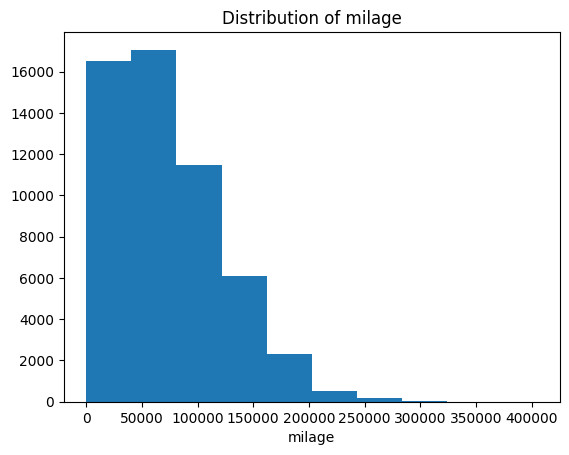

In [ ]:
plt.hist(df_train["milage"])
plt.xlabel("milage")
plt.title("Distribution of milage");

# Checking for outliers in the training data

In [ ]:
df_train.describe()["milage"]

count     54273.000000
mean      72746.175667
std       50469.490448
min         100.000000
25%       32268.000000
50%       66107.000000
75%      102000.000000
max      405000.000000
Name: milage, dtype: float64

The data is really spread out judging from the the std, It is really skewed.

In [ ]:
df_test.describe()["milage"]

count     36183.000000
mean      72479.266755
std       50714.968252
min         100.000000
25%       31681.000000
50%       65680.000000
75%      102000.000000
max      405000.000000
Name: milage, dtype: float64

our dataset is free of outliers, it's time to start exploring the relationship between apartment milage and price.

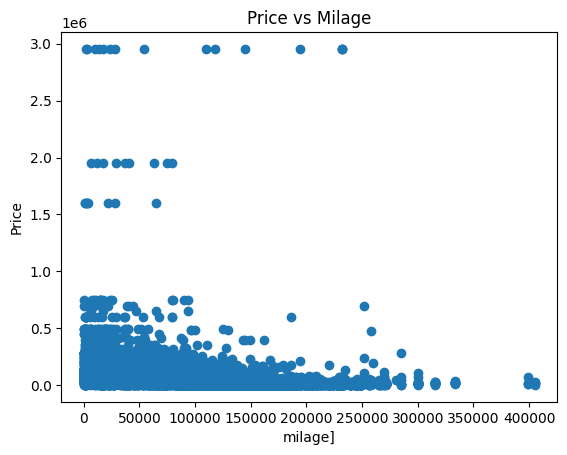

In [ ]:
plt.scatter(x=df_train["milage"], y =df_train["price"])
plt.xlabel("milage]")
plt.ylabel("Price")
plt.title("Price vs Milage");

This plot suggests that there's a moderate positive correlation between price and milage. This means that if thing we want to predict is price, milage will be a good feature to include., but not the oly feature if we want a good model.

# Checking for corelation btn the columnns.

<Axes: >

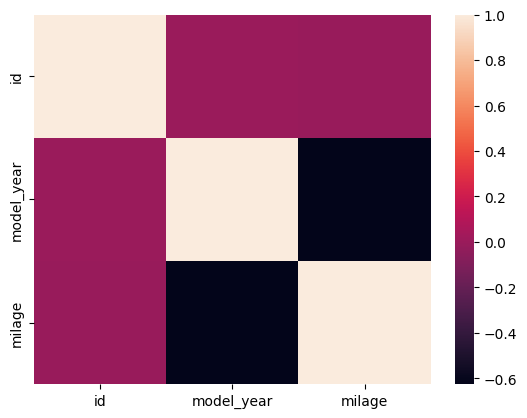

In [ ]:
 corr=df_train.select_dtypes('number').drop(columns='price').corr()
sns.heatmap(corr)

In [ ]:
df_train["HP"] = df_train["engine"].str.split(" ", expand = True)[0]
df_test["HP"] = df_test["engine"].str.split(" ", expand = True)[0]

In [ ]:
# Define a function to categorize transmission types
def categorize_transmission(text):
  text = text.upper()  # Convert to uppercase for case-insensitive matching
  if 'AUTOMATIC' in text or 'A/T' in text or 'CVT' in text or 'VARIABLE'in text:
    return 'Automatic'
  elif 'MANUAL' in text or 'M/T' in text or 'MT' in text:
    return 'Manual'
  elif 'DUAL' in text or 'AT/MT' in text:
    return 'Both'
  else:
    return "Other" # Keep unknown values unchanged



In [ ]:
df_train["transmission"] = df_train["transmission"].apply(categorize_transmission)
df_test["transmission"] = df_test["transmission"].apply(categorize_transmission)

In [ ]:
df_train = df_train.drop(['model', 'ext_col', 'int_col', 'clean_title','engine'], axis = 1)
df_test = df_test.drop(['model', 'ext_col', 'int_col', 'clean_title','engine'], axis = 1)

In [ ]:
# Here's our categorical column
print(df_train['fuel_type'].unique())
print(df_train['transmission'].unique())
print(df_train['brand'].unique())

['Gasoline' 'Hybrid' 'E85 Flex Fuel' 'Diesel' '–' 'Plug-In Hybrid'
 'not supported']
['Automatic' 'Manual' 'Both' 'Other']
['Ford' 'BMW' 'Jaguar' 'Pontiac' 'Acura' 'Audi' 'GMC' 'Maserati'
 'Chevrolet' 'Porsche' 'Mercedes-Benz' 'Tesla' 'Lexus' 'Kia' 'Lincoln'
 'Dodge' 'Volkswagen' 'Land' 'Cadillac' 'Mazda' 'RAM' 'Subaru' 'Hyundai'
 'MINI' 'Jeep' 'Honda' 'Hummer' 'Nissan' 'Toyota' 'Volvo' 'Genesis'
 'Mitsubishi' 'Buick' 'INFINITI' 'McLaren' 'Scion' 'Lamborghini' 'Bentley'
 'Suzuki' 'Ferrari' 'Alfa' 'Rolls-Royce' 'Chrysler' 'Aston' 'Rivian'
 'Lotus' 'Saturn' 'Lucid' 'Mercury' 'Maybach' 'FIAT' 'Plymouth' 'Bugatti']


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

# Select only numerical columns for VIF calculation
numerical_variables = df_train[['model_year','milage','price']]

# Check for non-numeric values BEFORE conversion and dropping NaNs
print(numerical_variables.dtypes)  # Check data types of each column
# Inspect any columns with non-numeric types and decide how to handle them
# For example, if 'accident' contains strings like "Yes" and "No",
# you might want to convert them to 1 and 0 before applying pd.to_numeric

# Convert all columns to numeric, coercing errors to NaN
numerical_variables = numerical_variables.apply(pd.to_numeric, errors='coerce')

# Drop rows with any missing values (introduced by coercion)
numerical_variables = numerical_variables.dropna()

# Check if the DataFrame is empty AFTER dropping NaNs
print(numerical_variables.shape) # Should print number of rows and columns

vif = pd.DataFrame()
vif["VIF"] = [variance_inflation_factor(numerical_variables.values, i) for i in range(numerical_variables.shape[1])]
vif["Features"] = numerical_variables.columns
vif

model_year    int64
milage        int64
price         int64
dtype: object
(54273, 3)


,VIF,Features
0,3.917641,model_year
1,3.263512,milage
2,1.375660,price


In [ ]:
# Clean the 'HP' column by removing non-numeric characters
df_train["HP"] = df_train["HP"].str.replace(r'\D', '', regex=True)

# Convert the 'HP' column to integer type, handling potential errors
df_train["HP"] = pd.to_numeric(df_train["HP"], errors='coerce').astype('Int64')

In [ ]:
# Clean the 'HP' column by removing non-numeric characters
df_test["HP"] = df_test["HP"].str.replace(r'\D', '', regex=True)

# Convert the 'HP' column to integer type, handling potential errors
df_test["HP"] = pd.to_numeric(df_test["HP"], errors='coerce').astype('Int64')

# Splitting Data

In [ ]:
X = df_train.drop('price', axis=1)
y = df_train['price']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 100)

In [ ]:
X_train.head()

,id,brand,model_year,milage,fuel_type,transmission,accident,HP
787,787,Land,2016,89400,Gasoline,Both,None reported,3400
18565,18565,Ford,2019,31600,Gasoline,Automatic,None reported,4600
134,134,Chevrolet,2007,191900,E85 Flex Fuel,Automatic,At least 1 accident or damage reported,3100
30516,30516,GMC,2009,94500,Gasoline,Automatic,At least 1 accident or damage reported,3200
11026,11026,Lincoln,2013,161000,Gasoline,Automatic,At least 1 accident or damage reported,4000


# **Build Model**

Baseline model;

In [ ]:
y_mean=y_train.mean()
y_pred_baseline=[y_mean] * len(y_train)
MAE=mean_absolute_error(y_train, y_pred_baseline)
print("Mean price:", round(y_mean , 2))

print("Baseline MAE:",round(MAE ,2) )

Mean price: 39250.1
Baseline MAE: 25826.44


if we always guess that the car price is 39218.44, we would be of by an average of 25737.35

# Iterate

In [ ]:

# Instantiate
ohe = OneHotEncoder(use_cat_names=True)
# Fit
ohe.fit(X_train)
# Transform
XT_train = ohe.transform(X_train)

imputer = SimpleImputer(strategy="mean")
imputer.fit(XT_train)
XT_train1 = imputer.transform(XT_train)

model = make_pipeline(
OneHotEncoder(use_cat_names=True),
SimpleImputer(),
SVR()
)
model.fit(X_train,y_train)

Pipeline(steps=[('onehotencoder',
                 OneHotEncoder(cols=['brand', 'fuel_type', 'transmission',
                                     'accident'],
                               use_cat_names=True)),
                ('simpleimputer', SimpleImputer()), ('svr', SVR())])

In [ ]:

# Instantiate
ohe = OneHotEncoder(use_cat_names=True)
# Fit
ohe.fit(X_train)
# Transform
XT_train = ohe.transform(X_train)

imputer = SimpleImputer(strategy="mean")
imputer.fit(XT_train)
XT_train1 = imputer.transform(XT_train)

model = make_pipeline(
OneHotEncoder(use_cat_names=True),
SimpleImputer(),
KNeighborsRegressor(n_neighbors = 2)
)
model.fit(X_train,y_train)

Evaluate

In [ ]:
y_pred_training=model.predict(X_train)
print("Training MAE:", mean_absolute_error(y_train,y_pred_training))

Training MAE: 21100.750184842054


# Doing the prediction on X test

In [ ]:
y_pred_test = pd.Series(model.predict(X_test))
y_pred_test

0        33007.769898
1        31547.300698
2        22623.471760
3        29230.096156
4        32192.499740
             ...     
10850    24551.391396
10851    27712.924182
10852    31607.836028
10853    31088.135652
10854    31618.858720
Length: 10855, dtype: float64

In [ ]:
MAE=mean_absolute_error(y_train, y_pred_baseline)
print("Mean price:", round(y_mean , 2))

print("Baseline MAE:",round(MAE ,2) )

In [ ]:
y_pred_test = pd.Series(model.predict(df_test))
y_pred_test

0        26915.792653
1        21301.224244
2        29487.290416
3        31594.947667
4        24785.429045
             ...     
36178    30759.059978
36179    22749.285051
36180    23395.236638
36181    29487.208053
36182    22330.543921
Length: 36183, dtype: float64

In [ ]:
coefficients =  model.named_steps['ridge'].coef_
features = model.named_steps['onehotencoder'].get_feature_names()
feat_imp = pd.Series(coefficients , index=features)
feat_imp

/usr/local/lib/python3.10/dist-packages/category_encoders/utils.py:366: FutureWarning: `get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.
  warnings.warn("`get_feature_names` is deprecated in all of sklearn. Use `get_feature_names_out` instead.",


id                                                     0.001123
brand_Ford                                        -15593.164837
brand_BMW                                         -16009.623017
brand_Jaguar                                       -6913.485026
brand_Pontiac                                     -15460.468629
                                                       ...     
int_col_Medium Pewter                              -5817.378322
int_col_Red/Black                                 -14984.283917
accident_None reported                              1575.016164
accident_At least 1 accident or damage reported    -1575.016164
clean_title_Yes                                        0.000000
Length: 3384, dtype: float64

In [ ]:
df_test.head()

,id,brand,model,model_year,milage,fuel_type,engine,transmission,ext_col,int_col,accident,clean_title
0,54273,Mercedes-Benz,E-Class E 350,2014,73000,Gasoline,302.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,A/T,White,Beige,None reported,Yes
1,54274,Lexus,RX 350 Base,2015,128032,Gasoline,275.0HP 3.5L V6 Cylinder Engine Gasoline Fuel,8-Speed A/T,Silver,Black,None reported,Yes
2,54275,Mercedes-Benz,C-Class C 300,2015,51983,Gasoline,241.0HP 2.0L 4 Cylinder Engine Gasoline Fuel,7-Speed A/T,Blue,White,None reported,Yes
3,54276,Land,Rover Range Rover 5.0L Supercharged Autobiogra...,2018,29500,Gasoline,518.0HP 5.0L 8 Cylinder Engine Gasoline Fuel,Transmission w/Dual Shift Mode,White,White,At least 1 accident or damage reported,Yes
4,54277,BMW,X6 xDrive40i,2020,90000,Gasoline,335.0HP 3.0L Straight 6 Cylinder Engine Gasoli...,8-Speed A/T,White,Black,At least 1 accident or damage reported,Yes


In [ ]:
df_new = pd.concat([df_test, y_pred_test], axis=1)

In [ ]:
df_new.head()

,id,brand,model_year,milage,fuel_type,transmission,accident,HP,0
0,54273,Mercedes-Benz,2014,73000,Gasoline,Automatic,None reported,3020,23398.343759
1,54274,Lexus,2015,128032,Gasoline,Automatic,None reported,2750,14854.745364
2,54275,Mercedes-Benz,2015,51983,Gasoline,Automatic,None reported,2410,25818.054342
3,54276,Land,2018,29500,Gasoline,Both,At least 1 accident or damage reported,5180,59674.829663
4,54277,BMW,2020,90000,Gasoline,Automatic,At least 1 accident or damage reported,3350,37067.035206


In [ ]:
df_new.columns

Index([          'id',        'brand',   'model_year',       'milage',
          'fuel_type', 'transmission',     'accident',           'HP',
                    0],
      dtype='object')

In [ ]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36183 entries, 0 to 36182
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            36183 non-null  int64  
 1   brand         36183 non-null  object 
 2   model_year    36183 non-null  int64  
 3   milage        36183 non-null  int64  
 4   fuel_type     36183 non-null  object 
 5   transmission  36183 non-null  object 
 6   accident      36183 non-null  object 
 7   HP            35943 non-null  Int64  
 8   0             36183 non-null  float64
dtypes: Int64(1), float64(1), int64(3), object(4)
memory usage: 2.5+ MB


In [ ]:
df_new = df_new.rename(columns={0: 'price'}) # Rename column '0' to 'price'
new_df = df_new[['id', 'price']].copy() # Now you can access the 'price' column

In [ ]:
new_df.head()

,id,price
0,54273,26915.792653
1,54274,21301.224244
2,54275,29487.290416
3,54276,31594.947667
4,54277,24785.429045


df1 = pd.concat([df1, df4], axis=1)

In [ ]:
import pandas as pd
from google.colab import drive

In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
new_df.to_csv('/content/drive/My Drive/submission5.csv', index=False) # extracting the dataframe to an csv file

In [ ]:
df_verify = pd.read_csv('/content/drive/My Drive/submission5.csv')
print(df_verify)

          id         price
0      54273  26915.792653
1      54274  21301.224244
2      54275  29487.290416
3      54276  31594.947667
4      54277  24785.429045
...      ...           ...
36178  90451  30759.059978
36179  90452  22749.285051
36180  90453  23395.236638
36181  90454  29487.208053
36182  90455  22330.543921

[36183 rows x 2 columns]
